The dataset is the tweet archive of Twitter user _**@dog_rates, also known as WeRateDogs.**_ WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. This file is already provided: _**twitter_archive_enhanced.csv**__

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (_**image_predictions.tsv**_) is hosted on Udacity's servers and should be downloaded programmatically using the **Requests** library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. _Each tweet's retweet count and favorite ("like")_ count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called _**tweet_json.txt**_ file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. **Note: do not include your Twitter API keys, secrets, and tokens in your project submission.**

**Key points to keep in mind when data wrangling for this project:**

- You only want _**original ratings (no retweets) that have images**_. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to _**assess and clean at least 8 quality issues and at least 2 tidiness issues**_ in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do _**not need to gather the tweets beyond August 1st, 2017.**_ You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

**Deliverables**
1) Store the clean DataFrame(s) in a CSV file with the main one named _**<u>twitter_archive_master.csv.<u>**_ If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a _**<u>SQLite database<u>**_ (which is to be submitted as well if you do).

2) Analyze and visualize your wrangled data in your _**<u>wrangle_act.ipynb<u>**_ Jupyter Notebook. **At least three (3) insights and one (1) visualization must be produced.**

3) Create a 300-600 word **written report** called _**<u>wrangle_report.pdf<u>**_ or _**<u>wrangle_report.html<u>**_ that briefly describes your wrangling efforts. This is to be framed as an internal document.

4) Create a 250-word-minimum written report called _**<u>act_report.pdf<u>**_ or _**<u>act_report.html<u>**_ that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see image below). You might prefer to use a word processor like Google Docs or Microsoft Word, however.

## 1. Gather

In [3]:
import pandas as pd
import numpy as np
import tweepy
import os
import requests
import json
import collections
import functools
import matplotlib as plt
%matplotlib inline

### 1.1 Twitter archive enhanced

In [2]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 1.2 Image prediction file

In [4]:
# Obtain from url the image-predictions.tsv file

image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv', 'wb') as image_pred_file:
    response = requests.get(image_pred_url)
    image_pred_file.write(response.content)

In [3]:
# Load image prediction data into a dataframe
tweet_image_pred = pd.read_csv('image-predictions.tsv', delim_whitespace=True)

### 1.3 Tweepy extra information

In [16]:
#tweepy API

consumer_key = 'xxx'
consumer_secret = 'xxx'
access_token = 'xxx'
access_secret = 'xxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Also, note that the tweets corresponding to a few tweet IDs in the archive may have been deleted. _**Try-except blocks may come in handy here.**_

To query all of the tweet IDs in the WeRateDogs Twitter archive, 20-30 minutes of running time can be expected. _**Printing out each tweet ID after it was queried and using a code timer were both helpful for sanity reasons**_. Setting the _**wait_on_rate_limit**_ and _**wait_on_rate_limit_notify**_ parameters to _**True**_ in the tweepy.api class is useful as well.

In [17]:
tweet_ids = tw_archive.tweet_id.values

In [23]:
test_tweet = api.get_status(tweet_ids[0], tweet_mode='extended')
test_tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [24]:
len(tweet_ids)

2356

In [26]:
# Iterate over tweet_ids to obtain favorites and retweet count. Then append these has dicts into df_list.
df_list = []

# Any tweet_ids not found by API, are appended to e_list
e_list = []

for id in tweet_ids:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception:
        e_list.append(id)

875021211251597312 23338 4156
874680097055178752 25437 4082
874434818259525634 0 12788
874296783580663808 23832 3638
874057562936811520 20794 3512
874012996292530176 31222 8997
873213775632977920 6551 1394
872967104147763200 24933 4770
872820683541237760 13515 3290
872620804844003328 19003 3217
872486979161796608 37348 8050
872122724285648897 31368 7173
871879754684805121 34364 9668
871762521631449091 18524 3081
871515927908634625 18500 3072
871102520638267392 19194 4887
871032628920680449 20873 3377
870804317367881728 30878 5480
870726314365509632 112 3
870656317836468226 11282 2308
870374049280663552 76497 23705
870308999962521604 20143 3685
870063196459192321 33550 7391
869772420881756160 39220 9055
869702957897576449 25930 5604
869596645499047938 14703 2768
869227993411051520 18786 3350
868880397819494401 60091 12832
868639477480148993 0 1836
868622495443632128 24481 4714
868552278524837888 9280 1836
867900495410671616 22346 3745
867774946302451713 31343 6556
867421006826221569 148

Rate limit reached. Sleeping for: 244


671182547775299584 1027 307


In [30]:
# Any tweet_ids not found by API, are appended to e_list_2
e_list_2 = []

for e in e_list:
    try:
        page = api.get_status(e, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(e, favorites, retweet_count)
    
    except Exception:
        e_list_2.append(e)

892177421306343426 30336 5487
891815181378084864 22808 3629
891689557279858688 38307 7542
891327558926688256 36574 8128
891087950875897856 18446 2721
890971913173991426 10731 1760
890729181411237888 58979 16490
890609185150312448 25383 3770
890240255349198849 28956 6389
890006608113172480 27936 6414
889880896479866881 25397 4352
889665388333682689 43627 8745
889638837579907072 24518 3904
889531135344209921 13815 1969
889278841981685760 22880 4644
888917238123831296 26494 3916
888804989199671297 23252 3705
888554962724278272 17936 3014
888078434458587136 19835 3036
887705289381826560 27564 4716
887517139158093824 42166 10280
887473957103951883 62410 15707
887343217045368832 30604 9212
887101392804085760 27894 5211
886983233522544640 31590 6668
886736880519319552 10869 2775
886680336477933568 20462 3916
886366144734445568 19203 2763
886267009285017600 108 3
886258384151887873 25441 5526
886054160059072513 0 96
885984800019947520 29627 5866
885528943205470208 32696 5581
885518971528720385

Rate limit reached. Sleeping for: 562


676590572941893632 874 115


In [43]:
len(e_list_2), len(df_list), len(e_list_2) + len(df_list)

(476, 1880, 2356)

I've executed the iterative process of retrieveing the JSON files from twitter for the remaining 476 tweets (from e_list_2) but keep on receiving no response so I'll assume that these ones are not possible to obtain the information.

In [53]:
df_list[0:2]

[{'tweet_id': 875021211251597312, 'favorites': 23338, 'retweet_count': 4156},
 {'tweet_id': 874680097055178752, 'favorites': 25437, 'retweet_count': 4082}]

In [54]:
rt_like_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

rt_like_df.to_csv('tweet_json.txt', index=False)

In [4]:
tweepy_info = pd.read_csv('tweet_json.txt')

## 2. Assess

### 2.1 Visual Assessment

#### 2.1.1 Twitter archive enhanced

In [8]:
tw_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**Quality** issues summary:
- HTML tags in source text.
- name columns contains words that are not names (ex. 'a').
- The missing data in "name" or type of dog columns is encoded as 'None'.

**Tidiness** issues summary:
- There are four columns indicating the type of dog in the tweets: doggo, floofer, pupper, and puppo. These columns can actually be melted into a single column.

#### 2.1.2 Image prediction file

In [9]:
tweet_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**Quality** issues summary:
- Dog breed predictions with "(\_)" separator.
- Some predictions are not dog breeds (ex. paper_towel or orange)

**Tidiness** issues summary:
- "True" dog breed predictions should be merged into the "tw_archive" to consolidate all the info together.

#### 2.1.3 Tweepy extra info

In [61]:
tweepy_info.head()

,tweet_id,favorites,retweet_count
0,875021211251597312,23338,4156
1,874680097055178752,25437,4082
2,874434818259525634,0,12788
3,874296783580663808,23832,3638
4,874057562936811520,20794,3512


**Tidiness** issues summary:
- Should be merged into the "tw_archive" to consolidate all the info together.

### 2.2 Programatic Assessment

#### 2.2.1 Twitter archive enhanced

In [10]:
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

181 retweets as seen in retweeted_status_id

In [11]:
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [94]:
#very high/low numerator and denominator values to review

text_denom = tw_archive[tw_archive.rating_denominator != 10].text.to_list()
text_denom

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 '@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 '

In [13]:
tw_archive.loc[342]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                      832087547559997440.0
in_reply_to_user_id                                                  30582082.0
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

As seen in the texts above, the ratings with denominator != 10 are because:
- were incorrectly handled when colleting information as appear two ratings and the first one was taken
- some ratings do not follow rule of denominator 10 (ex. rating 80/80, 143/130, etc)
- second tweet from the list is showing a date ("account starte on..") and no information.

In [14]:
tw_archive.rating_denominator.value_counts(), tw_archive.rating_numerator.value_counts()

(10     2333
 11        3
 50        3
 20        2
 80        2
 0         1
 120       1
 7         1
 170       1
 150       1
 130       1
 90        1
 110       1
 2         1
 70        1
 40        1
 16        1
 15        1
 Name: rating_denominator, dtype: int64,
 12      558
 11      464
 10      461
 13      351
 9       158
 8       102
 7        55
 14       54
 5        37
 6        32
 3        19
 4        17
 1         9
 2         9
 0         2
 15        2
 75        2
 420       2
 182       1
 204       1
 143       1
 121       1
 99        1
 20        1
 45        1
 27        1
 17        1
 24        1
 26        1
 44        1
 50        1
 60        1
 80        1
 84        1
 88        1
 1776      1
 960       1
 666       1
 144       1
 165       1
 Name: rating_numerator, dtype: int64)

We can see that the outliers both for numerator(<10 and estremely high values) and denominator (=! 10) are not frequent compared to the dataset

In [15]:
tw_archive.duplicated().sum()

0

In [16]:
tw_archive.tweet_id.duplicated().sum()

0

**Quality** issues summary:
- Incorrect datatypes (*_id, *timestamp)
- retweet information not needed for this project
- some rating numerator and denominator have extreme max/min values
- some tweets contain no information

#### 2.2.2 Image prediction file

In [17]:
tweet_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
tweet_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The values seem correct as the predictions % are between [0-1]

In [19]:
tweet_image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
crash_helmet            1
stove                   1
giant_panda             1
lorikeet                1
rain_barrel             1
Name: p1, Length: 378, dtype: int64

In [20]:
tweet_image_pred.duplicated().sum()

0

In [21]:
tweet_image_pred.tweet_id.duplicated().sum()

0

**Quality** issues summary:
- Incorrect datatypes (*_id)
- Missing information as "tw_archive" file has 2356 rows and this one 2075. Nothing can be done as the predictions file is given and the neural net is not accessible.

#### 2.2.3 Tweepy extra information

In [63]:
tweepy_info.describe()

,tweet_id,favorites,retweet_count
count,1.880000e+03,1880.000000,1880.000000
mean,7.588648e+17,8652.038830,3045.656383
std,6.524954e+16,12034.913444,4670.826023
min,6.711825e+17,0.000000,1.000000
25%,6.972677e+17,2176.500000,797.750000
50%,7.504678e+17,4264.000000,1666.000000
75%,8.142473e+17,10901.250000,3463.500000
max,8.921774e+17,150577.000000,74317.000000


In [64]:
tweepy_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       1880 non-null   int64
 1   favorites      1880 non-null   int64
 2   retweet_count  1880 non-null   int64
dtypes: int64(3)
memory usage: 44.2 KB


There doesn't seem to be any issue for this dataset on quality or tidiness. Nevertheless more than 400 tweets were not retreivable through tweepy API.

### Summary of quality and tidiness issues

**Quality**
1. <u>Twitter archive enhanced
    - HTML tags in source text.
    - name columns contains words that are not names (ex. 'a').
    - The missing data in "name" or type of dog columns is encoded as 'None'.
    - Incorrect datatypes (*_id, *timestamp)
    - retweet information not needed for this project
    - some rating numerator and denominator have extreme max/min values
    - some tweets contain no information

2. <u>Image prediction file:
    - Dog breed predictions with "(_)" separator.
    - Some predictions are not dog breeds (ex. paper_towel or orange)
    - Incorrect datatypes (*_id)
    - Missing information as "tw_archive" file has 2356 rows and this one 2075. Nothing can be done as the predictions file is given and the neural net is not accessible.

3. <u>Tweepy extra info
    - -

**Tidiness**
1. <u>Twiter archive enhanced:
    - There are four columns indicating the type of dog in the tweets: doggo, floofer, pupper, and puppo. These columns can actually be melted into a single column.

2. <u>Image prediction file:
    - "True" dog breed predictions should be merged into the "tw_archive" to consolidate all the info together.

3. <u>Tweepy extra info:
    - retweet_count and favorite_count should be part of the consolidated dataset.

## Clean

In [6]:
# Create copies of the tweet_data_archived, tweet_data_extra and tweet_image_pred dataframes

tw_archive_clean = tw_archive.copy()
pred_clean = tweet_image_pred.copy()
tweepy_clean = tweepy_info.copy()

### <u>Tidiness Issue 1 = 'There are four columns: doggo, floofer, pupper, and puppo'<u>

#### __*Define*__

Melt the 4 different columns of the dog types into one single column showing the dog type per row

#### __*Code*__

In [7]:
tw_archive_clean.doggo.value_counts(), tw_archive_clean.floofer.value_counts(), tw_archive_clean.pupper.value_counts(), tw_archive_clean.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 None       2346
 floofer      10
 Name: floofer, dtype: int64,
 None      2099
 pupper     257
 Name: pupper, dtype: int64,
 None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [8]:
tw_archive_clean = tw_archive_clean.melt(id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
'rating_denominator', 'name'], value_name= 'dog_type', value_vars=['doggo', 'floofer', 'pupper','puppo'])

In [9]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  variable                    9424 

we can see that now the dataframe has 2356x4=9424 rows as has duplicated the dog_types.

In [10]:
tw_archive_clean.dog_type.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_type, dtype: int64

In [11]:
tw_archive_clean = tw_archive_clean.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [12]:
tw_archive_clean = tw_archive_clean.drop('variable', axis=1)

#### _**Test**_

In [13]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_type                    23

In [14]:
tw_archive_clean.dog_type.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_type, dtype: int64

Now there are 14 values less for doggo type. This is due to rows where there was more than one dog_type informed

### <u>Tidiness Issue 2: 'tweet_image_pred: correct predictions should be combined with tweet_data_archived'<u>

#### __*Define*__

Extract the most likely "True" prediction from "tweet_image_pred" and merge them to the "tw_archive" file

#### __*Code*__

In [15]:
pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
breed = []
prob = []

def breed_prob(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        prob.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        prob.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        prob.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        prob.append(0)
        
# apply by columns
pred_clean.apply(breed_prob, axis=1)

# add lists created to master dataframe
pred_clean['breed'] = breed
pred_clean['prob'] = prob

In [17]:
pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,prob
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [18]:
tw_archive_clean = pd.merge(tw_archive_clean, pred_clean[['tweet_id','breed','prob', 'jpg_url', 'img_num']], on='tweet_id', how='left')

#### _**Test**_

In [19]:
tw_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num
0,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,vizsla,0.000081,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1.0
1,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,Unknown,0.000000,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1.0


Both datasets have merged correctly. But we can see that for example for the two first entries, the probability obtained from the neural net is very low. Once reviewed the images associated to the tweets it can be seen that these are screenshots of the mobile app and therefore the iamge is not correct for the net to predict correctly

### <u>Quality Issue 1: 'Incorrect datatypes (*_id, *timestamp)'<u>

#### __*Define*__

Convert _id columns into strings and timestamp columns into datetime format

#### __*Code*__

In [20]:
for each_col in tw_archive_clean.columns:
    if 'id' in each_col:
        tw_archive_clean[each_col] = tw_archive_clean[each_col].astype(str)

In [21]:
for each_col in tw_archive_clean.columns:
    if 'time' in each_col:
        tw_archive_clean[each_col] = pd.to_datetime(tw_archive_clean[each_col])

#### __*Test*__

In [22]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### <u>Quality Issue 2: 'retweet information not needed for this project'<u>

#### __*Define*__

Remove all rows with retweeted_status_id and in_reply_to_status_id then drop the columns related to retweet fields:
- in_reply_to_xxx= Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s xxx
- retweeted_status= Users can amplify the broadcast of Tweets authored by other users by retweeting . Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. This attribute contains a representation of the original Tweet that was retweeted. Note that retweets of retweets do not show representations of the intermediary retweet, but only the original Tweet. (Users can also unretweet a retweet they created by deleting their retweet.)
    
#### __*Code*__

In [23]:
tw_archive_clean = tw_archive_clean[tw_archive_clean.retweeted_status_id == 'nan']

In [24]:
tw_archive_clean = tw_archive_clean[tw_archive_clean.in_reply_to_status_id == 'nan']

In [25]:
tw_archive_clean = tw_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#### _**Test**_

In [26]:
tw_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num
2,667549055577362432,2015-11-20 03:44:31+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,Unknown,0.000000,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0
3,667546741521195010,2015-11-20 03:35:20+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,toy_poodle,0.787424,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0
4,667544320556335104,2015-11-20 03:25:43+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,Pomeranian,0.412893,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0
5,667538891197542400,2015-11-20 03:04:08+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,Yorkshire_terrier,0.618957,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0
6,667724302356258817,2015-11-20 15:20:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,Unknown,0.000000,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1.0


### <u>Quality Issue 3: 'remove tweets without image'<u>

#### __*Define*__

Delete tweets where jpg_url is NaN
    
#### __*Code*__

In [27]:
tw_archive_clean = tw_archive_clean[tw_archive_clean.jpg_url.notnull()]

#### _**Test**_

In [28]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 2 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_type            1971 non-null   object             
 9   breed               1971 non-null   object             
 10  prob                1971 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [29]:
tw_archive_clean[tw_archive_clean.jpg_url.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num


### <u>Quality Issue 4: 'name columns contains words that are not names (ex. 'a')'<u>

#### __*Define*__

Review all dog "names" and modify the ones that are incorrect to "None".
    
#### __*Code*__

Looks like our main problem is that most incorrect names are 'a', 'an', 'the', etc. so mainly names that start with lower_case letters are wrong.

In [30]:
names=[]

def wrong_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
tw_archive_clean.apply(wrong_name, axis=1)

2       None
3       None
4       None
5       None
6       None
        ... 
2349    None
2351    None
2353    None
2354    None
2355    None
Length: 1971, dtype: object

In [31]:
tw_archive_clean['name'] = names

#### _**Test**_

In [32]:
tw_archive_clean['name'].unique()

array(['None', 'George', 'Kial', 'Frank', 'Dook', 'Hall', 'Philippe',
       'Naphaniel', 'Olive', 'Otis', 'Cleopatricia', 'Erik', 'Stu',
       'Tedrick', 'Calvin', 'Filup', 'Shaggy', 'Reese', 'Cupcake',
       'Clybe', 'Dave', 'Keet', 'Gabe', 'Klevin', 'Jeph', 'Jockson',
       'Carll', 'Pipsy', 'Bradlay', 'Biden', 'Fwed', 'Genevieve',
       'Joshwa', 'Timison', 'Clarence', 'Kenneth', 'Churlie', 'Jiminy',
       'Alfie', 'Rusty', 'Sophie', 'Jareld', 'Bisquick', 'Ron',
       'Skittles', 'Torque', 'DayZ', 'Jo', 'Kallie', 'Marvin', 'Spark',
       'Gòrdón', 'Josep', 'Lugan', 'Christoper', 'Jimothy', 'Kreggory',
       'Scout', 'Walter', 'Phineas', 'Monkey', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Emmy',
       'Shadow', 'Jeffrey', 'Canela', 'Maya', 'Gerald', 'Mingus',
       'Waffles', 'Jimbo', 'Maisey', 'Derek', 'Ralphus', 'Zeke', 'Tilly',
       'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey', 'Koda', 'Bruno',
       'Ted', 'Oliver', 'J

### <u>Quality Issue 5: 'tweepy dataframe should be merged into the "tw_archive" to consolidate all the info together for completeness.'<u>

#### __*Define*__

merge retweet and likes info into the tw_archive dataframe.
    
#### __*Code*__

In [33]:
tweepy_clean.tweet_id = tweepy_clean.tweet_id.astype(str)

In [34]:
tw_archive_clean = pd.merge(tw_archive_clean, tweepy_clean, on='tweet_id', how='left')

#### _**Test**_

In [35]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_type            1971 non-null   object             
 9   breed               1971 non-null   object             
 10  prob                1971 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### <u>Quality Issue 6: 'html tags in source text'<u>

#### __*Define*__

From source column extract the content from =  '> + content + <'
    
#### __*Code*__

In [36]:
tw_archive_clean.source.to_list()[1]

'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'

In [37]:
tw_archive_clean.source = tw_archive_clean.source.str.extract('>(.*)<', expand=True)

#### __*Test*__

In [38]:
tw_archive_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### <u>Quality Issue 7: 'The missing data is encoded as "None"'<u>

#### __*Define*__

Replace the "None" and "Unknown" for NaNs 
    
#### __*Code*__

In [62]:
#search which columns have 'None' or 'Unknown' values
for col in tw_archive_clean.columns:
    for each in tw_archive_clean[col]:
        if each in ('None','Unknown'):
            print(col)
            break
        else:
            next

name
dog_type
breed


In [86]:
names_nan=[]
type_nan=[]
breed_nan=[]

def None_name(row):
    for col in ('name', 'dog_type', 'breed'):
        if col == 'name':
            if row[col] in ('None', 'Unknown'):
                names_nan.append(float("NaN"))
            else:
                names_nan.append(row[col])
                
        elif col== 'dog_type':
            if row[col] in ('None', 'Unknown'):
                type_nan.append(float("NaN"))
            else:
                type_nan.append(row[col])      
                
        elif col== 'breed':
            if row[col] in ('None', 'Unknown'):
                breed_nan.append(float("NaN"))
            else:
                breed_nan.append(row[col])             
        
tw_archive_clean.apply(None_name, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1966    None
1967    None
1968    None
1969    None
1970    None
Length: 1971, dtype: object

In [88]:
tw_archive_clean['name'] = names_nan
tw_archive_clean['dog_type'] = type_nan
tw_archive_clean['breed'] = breed_nan

#### __*Test*__

In [89]:
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1349 non-null   object             
 8   dog_type            303 non-null    object             
 9   breed               1666 non-null   object             
 10  prob                1971 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

In [93]:
tw_archive_clean.name.isnull().value_counts()

False    1349
True      622
Name: name, dtype: int64

### <u>Quality Issue 8: 'some rating numerator and denominator have extreme max/min values'<u>

#### __*Define*__

Analyze the extreme values and decide if need cleaning, deleting or modifying.
    
#### __*Code*__

In [182]:
rating_df = tw_archive_clean[tw_archive_clean.rating_denominator != 10]

In [183]:
rating_df = rating_df.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count', 'jpg_url','dog_type','breed','prob','img_num'],axis=1)

In [184]:
pd.set_option("display.max_colwidth",300)
rating_df

,tweet_id,text,rating_numerator,rating_denominator
102,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
230,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
312,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
342,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
410,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
439,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
475,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
486,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
566,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
606,709198395643068416,"From left to right:\r\nCletus, Jerome, Alejandro, Burp, &amp; Titson\r\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


**From the above dataframe and the images related to each tweet, it seems like for groups of dogs the ratings are multiplied by nº of dogs in image. With this in mind and knowing that the denominator should be 10 we can obtain the nº of dogs in each image with: (rating_denom / 10) or (capture all digits before the last one [:-1]). Then apply the number as a division to both numerator and denominator.**

In [185]:
for i in rating_df.index:
    if rating_df.loc[i, 'rating_denominator'] > 10:
        x = int(float(str(rating_df.loc[i, 'rating_denominator'])[:-1]))
        rating_df.loc[i, 'rating_numerator'] = int(rating_df.loc[i, 'rating_numerator'] / x)
        rating_df.loc[i, 'rating_denominator'] = int(rating_df.loc[i, 'rating_denominator'] / x)
    else:
        next

In [188]:
rating_df[rating_df.rating_denominator != 10]

,tweet_id,text,rating_numerator,rating_denominator
102,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
475,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
937,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
1125,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


Modify these ones manually as the text was captures incorrectly

In [190]:
rating_df.loc[102, 'rating_numerator'] = 9
rating_df.loc[102, 'rating_denominator'] = 10

In [193]:
rating_df.loc[475, 'rating_numerator'] = 14
rating_df.loc[475, 'rating_denominator'] = 10

In [198]:
rating_df.loc[937, 'rating_numerator'] = 10
rating_df.loc[937, 'rating_denominator'] = 10

In [199]:
rating_df[rating_df.rating_denominator != 10]

,tweet_id,text,rating_numerator,rating_denominator
1125,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


In [201]:
tw_archive_clean.loc[1125]

tweet_id                                                                                                                                                                         810984652412424192
timestamp                                                                                                                                                                 2016-12-19 23:06:23+00:00
source                                                                                                                                                                           Twitter for iPhone
text                  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
expanded_urls                                                                                   https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
rating_numerator    

As the last one does not have a rating per se, we'll modify it to basic 10/10.

In [202]:
rating_df.loc[1125, 'rating_numerator'] = 10
rating_df.loc[1125, 'rating_denominator'] = 10

In [204]:
for i in rating_df.index:
    tw_archive_clean.loc[i,'rating_denominator'] = rating_df.loc[i, 'rating_denominator']
    tw_archive_clean.loc[i,'rating_numerator'] = rating_df.loc[i, 'rating_numerator']

In [207]:
tw_archive_clean[tw_archive_clean.rating_numerator >14]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num,favorites,retweet_count
834,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\r\n\r\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,NaN,NaN,NaN,0.000000,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,NaN,NaN
895,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,NaN,kuvasz,0.438627,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,1653.0,463.0
1483,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN,NaN,0.000000,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,4945.0,2375.0
1608,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,Pomeranian,0.467321,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,17980.0,6000.0
1918,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper,clumber,0.946718,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,6419.0,1561.0


In [210]:
#these had decimal digits and where not correctly picked by the model.
tw_archive_clean.loc[895, 'rating_numerator'] = 11
tw_archive_clean.loc[1608, 'rating_numerator'] = 10
tw_archive_clean.loc[1918, 'rating_numerator'] = 11
tw_archive_clean.loc[1483, 'rating_numerator'] = 11 #as the max rating is 14 and this image has rt and likes +- as loc=1918 we will leave it with an 11 rating.

Unfortunately the last post with an extreme numerator value (snoop dog with 420, lol) will be deleted as he is not a doggo but an OG.

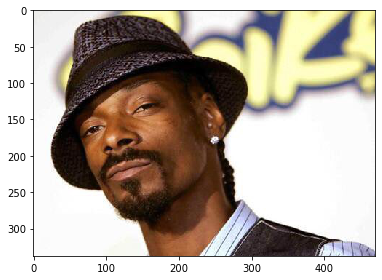

In [228]:
from skimage import io
io.imshow(io.imread("https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg"))
io.show()

In [214]:
tw_archive_clean.drop(834, axis=0, inplace=True)

#### __*Test*__

In [215]:
tw_archive_clean.rating_denominator.value_counts()

10    1970
Name: rating_denominator, dtype: int64

In [216]:
tw_archive_clean[tw_archive_clean.rating_numerator >14]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num,favorites,retweet_count


## Final dataframe

In [269]:
tw_archive_clean.to_csv('twitter_archive_master.csv',index=False)

In [4]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num,favorites,retweet_count
0,667549055577362432,2015-11-20 03:44:31+00:00,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,NaN,NaN,NaN,0.000000,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,NaN,NaN
1,667546741521195010,2015-11-20 03:35:20+00:00,Twitter Web Client,Here is George. George took a selfie of his ne...,https://twitter.com/dog_rates/status/667546741...,9,10,George,NaN,toy_poodle,0.787424,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,NaN,NaN
2,667544320556335104,2015-11-20 03:25:43+00:00,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,10,10,Kial,NaN,Pomeranian,0.412893,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,NaN,NaN
3,667538891197542400,2015-11-20 03:04:08+00:00,Twitter Web Client,This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,NaN,NaN,Yorkshire_terrier,0.618957,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,NaN,NaN
4,667724302356258817,2015-11-20 15:20:54+00:00,Twitter Web Client,What a dog to start the day with. Very calm. L...,https://twitter.com/dog_rates/status/667724302...,7,10,NaN,NaN,NaN,0.000000,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1.0,NaN,NaN


## sql database

In [630]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///WeRateDogs.db')

df.to_sql('master', engine, index=False)

## Analysis and visualization

1. Which are the top tweeted breeds
2. Is the tweeting hour related with the retweets and likes obtained?
3. Breeds with highest ratings

### 1. Which are the top tweeted breeds

In [447]:
pd.set_option("display.max_colwidth", 100)

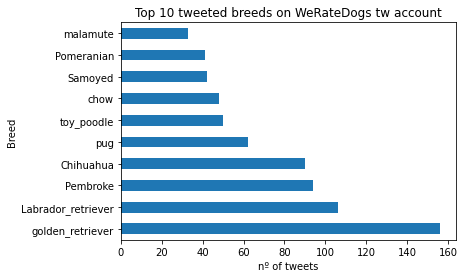

In [272]:
df[df.breed.notnull()]['breed'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 tweeted breeds on WeRateDogs tw account')
plt.xlabel('nº of tweets')
plt.ylabel('Breed');

In [9]:
lab = (((df[df.breed == 'golden_retriever'])['jpg_url']).sample(1))
lab

451    https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg
Name: jpg_url, dtype: object

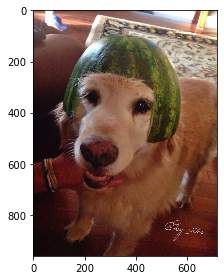

In [11]:
from skimage import io
io.imshow(io.imread('https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg'))
io.show()

**The most tweeted breed is golden retriever.**

### 2. Is the tweeting hour related with the retweets and likes obtained?

In [286]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [428]:
hours_fav=[]
for hour in range(0,23):
    hours_fav.append({'hour':  hour,
                      'favorites': df[df.timestamp.dt.hour == hour].favorites.mean()})

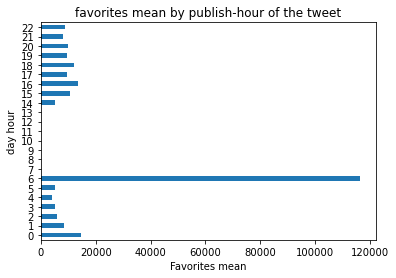

In [628]:
hours_df = pd.DataFrame(hours_fav, columns = ['hour', 'favorites'])
hours_df['favorites'].plot(kind='barh')
plt.title('favorites mean by publish-hour of the tweet')
plt.xlabel('Favorites mean')
plt.ylabel('day hour');

In [453]:
df[df.timestamp.dt.hour == 6]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num,favorites,retweet_count
776,669037058363662336,2015-11-24 06:17:19+00:00,Twitter for iPhone,"Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an assh...",https://twitter.com/dog_rates/status/669037058363662336/photo/1,10,10,NaN,NaN,Chihuahua,0.803528,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1.0,NaN,NaN
1030,674468880899788800,2015-12-09 06:01:26+00:00,Twitter for iPhone,This is Louis. He thinks he's flying. 13/10 this is a legendary pup https://t.co/6d9WziPXmx,"https://twitter.com/dog_rates/status/674468880899788800/photo/1,https://twitter.com/dog_rates/st...",13,10,Louis,NaN,chow,0.526230,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2.0,NaN,NaN
1227,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13,10,Stephan,NaN,Chihuahua,0.505370,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1.0,116299.0,54193.0


In [13]:
pd.set_option("display.max_colwidth", 300)
df.loc[1227]

tweet_id                                                                                   807106840509214720
timestamp                                                                           2016-12-09 06:17:20+00:00
source                                                                                     Twitter for iPhone
text                    This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
expanded_urls                                 https://twitter.com/dog_rates/status/807106840509214720/video/1
rating_numerator                                                                                           13
rating_denominator                                                                                         10
name                                                                                                  Stephan
dog_type                                                                                                  NaN
breed     

**By looking into the "extended_url" we can see that the tweet actually has 116k likes. Trying to plot the mean favorite count per hour is not very accurate as we do not have information of all the retweets and likes and thus the means are biased. As for example for 6 we have this extreme value because there is just 1 tweet and with a high number of favorites**

**As the previous graph was not very illustrative, we'll try to plot the hours where the poeple from WeRateDogs are most active tweeting.**

### 2.2. Activity hours of WeRateDogs

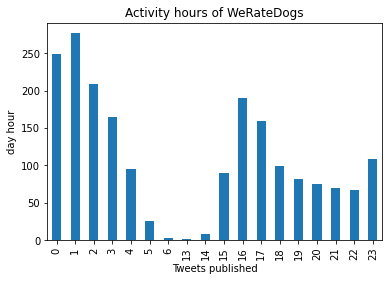

In [629]:
df.timestamp.dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('Activity hours of WeRateDogs')
plt.xlabel('Tweets published')
plt.ylabel('day hour');

**We can see that the hours with more activity are late at night or at evening. I suspect that these hours are translated to my time zone as it is strange to have so many tweets between 2-4 in the morning.**

### 3. Breeds with highest ratings

In [534]:
breed_overall=[]

for each_breed in df.breed.unique():
    if each_breed == float('NaN'):
        next
    else:
            breed_overall.append({'breed': each_breed,
                              'pond_fav': df[df.breed == each_breed].rating_numerator.mean()})                       

In [535]:
breed_ov_df = pd.DataFrame(breed_overall, columns = ['breed', 'pond_fav'])

In [565]:
top_breeds = breed_ov_df.sort_values('pond_fav', ascending=False)[:10]

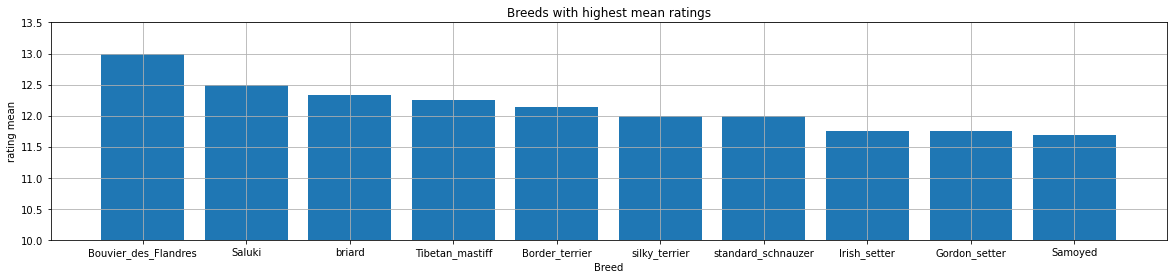

In [627]:
plt.figure(figsize=(20,4))
plt.bar(range(0,10), breed_ov_df.pond_fav.nlargest(10))
plt.xticks(range(0,10), top_breeds.breed);
plt.title('Breeds with highest mean ratings')
plt.grid()
plt.xlabel('Breed')
plt.ylim([10,13.5])
plt.ylabel('rating mean');

In [599]:
df[df.breed =='Bouvier_des_Flandres']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,breed,prob,jpg_url,img_num,favorites,retweet_count
1330,861288531465048066,2017-05-07 18:36:02+00:00,Twitter for iPhone,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOT...,https://twitter.com/dog_rates/status/861288531465048066/video/1,13,10,NaN,NaN,Bouvier_des_Flandres,0.08261,https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg,1.0,15939.0,3749.0


**The top rated breed by mean is "Bouvier des Flandres" with a rating =13 but with only 1 rating. We'll do the same analysis but with the condition of having at least 10 tweets with likes available.**

In [613]:
breed_ov_10=[]

for each_breed in df.breed.unique():
    if len(df[df.breed == each_breed]) < 10:
        next
    else:
        breed_ov_10.append({'breed': each_breed,
                              'pond_fav': df[df.breed == each_breed].rating_numerator.mean()})     

In [616]:
breed_ov10_df = pd.DataFrame(breed_ov_10, columns = ['breed', 'pond_fav'])
top_10 = breed_ov10_df.sort_values('pond_fav', ascending=False)[:10]
top_10

,breed,pond_fav
39,Samoyed,11.690476
10,golden_retriever,11.557692
48,Great_Pyrenees,11.466667
3,Pembroke,11.425532
25,chow,11.416667
24,Eskimo_dog,11.409091
36,cocker_spaniel,11.333333
52,kelpie,11.307692
35,Bernese_mountain_dog,11.272727
21,Siberian_husky,11.250000


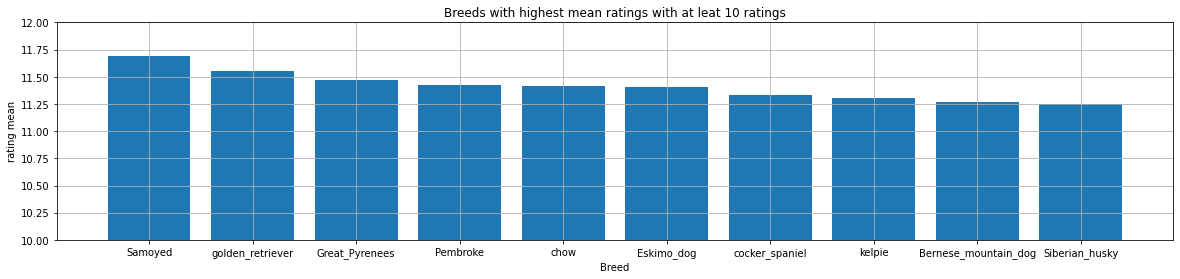

In [631]:
plt.figure(figsize=(20,4))
plt.bar(range(0,10), top_10.pond_fav.nlargest(10))
plt.xticks(range(0,10), top_10.breed);
plt.title('Breeds with highest mean ratings with at leat 10 ratings')
plt.grid()
plt.xlabel('Breed')
plt.ylabel('rating mean')
plt.ylim([10,12]);

**We can now say that with this plot, the mean does not come from a single tweet and that the highest rated breed is "Samoyed” followed by "Golden retriever".**